# <font color='DarkGreen'> <center> Starcraft Player Analysis

<img src="https://upload.wikimedia.org/wikipedia/en/thumb/9/93/StarCraft_box_art.jpg/220px-StarCraft_box_art.jpg" width=500 height=200>

## Problem Statement: Starcraft Player Performance Analysis

**Background**

- Starcraft is a real-time strategy game where player performance and strategy play crucial roles in determining success. Understanding the factors that influence player performance can provide insights into effective gameplay strategies and help in developing tools and recommendations for players to improve their skills.

**Objective**
- The primary objective of this project is to analyze the in-game behaviors and strategies of Starcraft players to identify key factors that contribute to higher performance levels, as measured by the LeagueIndex. By examining various gameplay metrics, we aim to uncover patterns and relationships that can guide players towards more successful strategies.

**Methodology**

1. Data Cleaning and Preprocessing: Handle missing values, convert data types as necessary, and standardize the data for analysis.
2. Univariate Analysis: Explore the distribution of individual metrics to understand player behaviors.
3. Bivariate Analysis: Use scatter plots, box plots, and correlation analysis to examine relationships between pairs of variables.
4. Multivariate Analysis: Apply multiple linear regression and PCA-based clustering to understand the combined effects of multiple variables on player performance.
5. Visualization: Create visualizations to illustrate the findings and make the insights easily interpretable.

**Expected Outcomes**

* Identification of key metrics that significantly impact player performance.
* Insights into effective gameplay strategies based on in-game behaviors and actions.
* Clusters of gameplay strategies that correlate with higher performance levels.
* Recommendations for players to improve their performance based on data-driven insights.

**Conclusion**

* By analyzing the Starcraft player dataset, we aim to provide actionable insights and recommendations that can help players enhance their gameplay strategies and achieve higher performance levels. This project will also contribute to the broader understanding of player behaviors in real-time strategy games.

### Importing Required Dependencies

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [36]:
# reading the datset and setting options to view full columns
df = pd.read_csv(r"C:\Users\admin\Downloads\starcraft_player_data.csv")
pd.set_option('display.max_columns',None)
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


In [37]:
# inspecrting the shape of the dataset
df.shape

(3395, 20)

In [38]:
# inspecting the meta information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

In [39]:
# inspecting the null value count in the data
df.isnull().sum()

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

In [40]:
# inspecting the duplicate values 
df.duplicated().sum()

0

In [41]:
df.describe()

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,4805.012371,4.184094,117.046947,0.004299,0.000374,4.364654,0.000098,0.000387,0.003463,40.361562,63.739403,5.272988,22.131664,0.001032,6.534021,0.000059,0.000142
std,2719.944851,1.517327,51.945291,0.005284,0.000225,2.360333,0.000166,0.000377,0.000992,17.153570,19.238869,1.494835,7.431719,0.000519,1.857697,0.000111,0.000265
min,52.000000,1.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.093600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2464.500000,3.000000,79.900200,0.001258,0.000204,3.000000,0.000000,0.000140,0.002754,28.957750,50.446600,4.272850,17.000000,0.000683,5.000000,0.000000,0.000000
50%,4874.000000,4.000000,108.010200,0.002500,0.000353,4.000000,0.000040,0.000281,0.003395,36.723500,60.931800,5.095500,22.000000,0.000905,6.000000,0.000000,0.000020
75%,7108.500000,5.000000,142.790400,0.005133,0.000499,6.000000,0.000119,0.000514,0.004027,48.290500,73.681300,6.033600,27.000000,0.001259,8.000000,0.000086,0.000181
max,10095.000000,8.000000,389.831400,0.043088,0.001752,10.000000,0.003019,0.004041,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [45]:
df.corr(numeric_only=True)

,GameID,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
GameID,1.000000,0.102601,0.159691,0.160802,0.136184,0.117366,0.074045,0.046583,0.089635,-0.102572,-0.087222,0.047255,0.032313,-0.011636,0.021204,-0.027098,0.003248
LeagueIndex,0.102601,1.000000,0.662309,0.490599,0.531125,0.351213,0.312544,0.233231,0.612192,-0.553246,-0.673939,0.143121,0.220676,0.295643,0.133508,0.148834,0.145733
APM,0.159691,0.662309,1.000000,0.840693,0.578416,0.361704,0.271021,0.322179,0.651237,-0.575275,-0.722402,0.383985,0.220749,0.349692,0.100844,0.136143,0.131587
SelectByHotkeys,0.160802,0.490599,0.840693,1.000000,0.504526,0.302096,0.197158,0.143368,0.398505,-0.304290,-0.415388,0.163282,0.083481,0.141723,0.006121,0.044002,0.061037
AssignToHotkeys,0.136184,0.531125,0.578416,0.504526,1.000000,0.420242,0.242196,0.193043,0.486729,-0.396891,-0.482191,0.093668,0.192928,0.183065,0.132829,0.144603,0.154410
UniqueHotkeys,0.117366,0.351213,0.361704,0.302096,0.420242,1.000000,0.180592,0.141576,0.372079,-0.242815,-0.323103,-0.016400,0.264650,0.108141,0.225030,0.110363,0.102453
MinimapAttacks,0.074045,0.312544,0.271021,0.197158,0.242196,0.180592,1.000000,0.242269,0.177343,-0.237633,-0.199904,0.134804,0.166392,0.077624,0.120824,0.040239,0.044528
MinimapRightClicks,0.046583,0.233231,0.322179,0.143368,0.193043,0.141576,0.242269,1.000000,0.176137,-0.254466,-0.230660,0.307512,0.172592,0.206594,0.148699,0.091604,0.090650
NumberOfPACs,0.089635,0.612192,0.651237,0.398505,0.486729,0.372079,0.177343,0.176137,1.000000,-0.506261,-0.820334,-0.232018,0.460275,0.277891,0.306295,0.181484,0.168293
GapBetweenPACs,-0.102572,-0.553246,-0.575275,-0.304290,-0.396891,-0.242815,-0.237633,-0.254466,-0.506261,1.000000,0.689402,-0.311072,-0.095330,-0.235419,-0.084855,-0.074659,-0.090566


## Data Cleaning

In [71]:
# Replace '?' with NaN in 'Age', 'HoursPerWeek', and 'TotalHours' columns
df['Age'] = df['Age'].replace('?', np.nan)
df['HoursPerWeek'] = df['HoursPerWeek'].replace('?', np.nan)
df['TotalHours'] = df['TotalHours'].replace('?', np.nan)

# Print the number of null values after cleaning
print("Null values after cleaning:", df.isnull().sum())

# Drop rows with any NaN values
df.dropna(inplace=True)

# Print the number of null values after removal
print()
print("Post null values removal:", df.isnull().sum())

# Type casting the 'Age', 'HoursPerWeek', and 'TotalHours' columns to integers
df['Age'] = df['Age'].astype(int)
df['HoursPerWeek'] = df['HoursPerWeek'].astype(int)
df['TotalHours'] = df['TotalHours'].astype(int)

# Print the data types of the 'Age', 'HoursPerWeek', and 'TotalHours' columns
print()
print(df['Age'].dtype)
print(df['HoursPerWeek'].dtype)
print(df['TotalHours'].dtype)


Null Values after cleaning: GameID                   0
LeagueIndex              0
Age                     55
HoursPerWeek            56
TotalHours              57
APM                      0
SelectByHotkeys          0
AssignToHotkeys          0
UniqueHotkeys            0
MinimapAttacks           0
MinimapRightClicks       0
NumberOfPACs             0
GapBetweenPACs           0
ActionLatency            0
ActionsInPAC             0
TotalMapExplored         0
WorkersMade              0
UniqueUnitsMade          0
ComplexUnitsMade         0
ComplexAbilitiesUsed     0
dtype: int64

Post null values removal: GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
To

## Exploratory Data Analysis

### Distibution of player's age

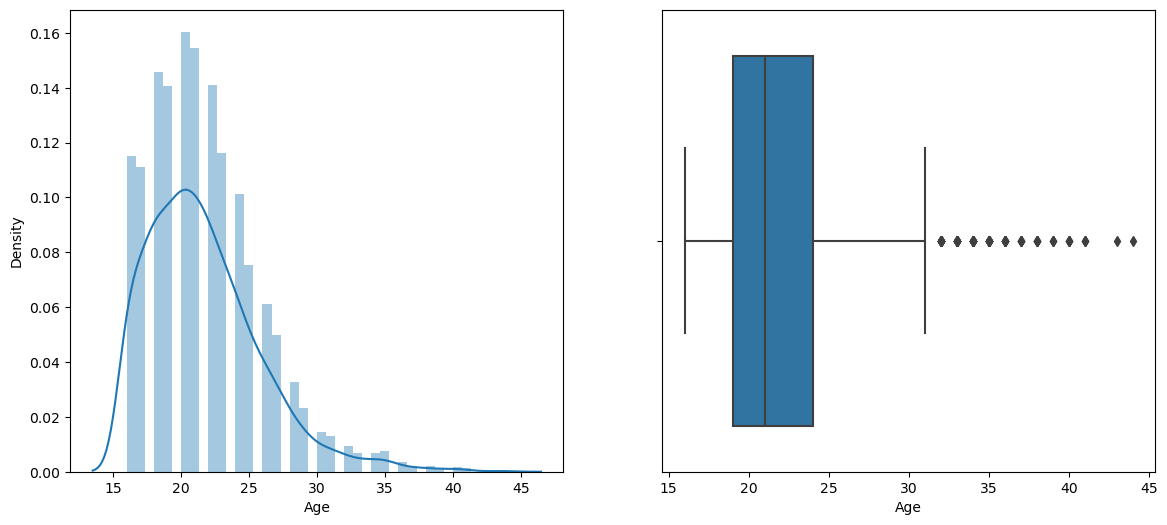

Data is right skewed by : 1.1518919407467778


In [89]:
# Creating a subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Creating the distribution plot for 'Age'
sns.histplot(df['Age'], kde=True, ax=axes[0])

# Creating the box plot for 'Age'
sns.boxplot(x=df['Age'], ax=axes[1])

# Display the plots
plt.show()

# Calculate and print the skewness of the 'Age' data
print("Data is right skewed by:", df['Age'].skew())

**`Observation`**:
1. Age Distribution (2024):
- The majority of Starcraft 2 players fall within the age range of 18-34 years. This demographic, often referred to as the “millennial” generation, has grown up with video games as a staple form of entertainment1.

- 15-19 years: 30%
- 20-24 years: 39%
- 25-29 years: 15%
- 30-34 years: 16%
- 35-39 years: 6%
- 40+ years: 2%

2. Outliers 
- We can see there are clearly outliers affecting the data which are middle aged players.
- we can find above 30 years players 

### How many hours players typically play?

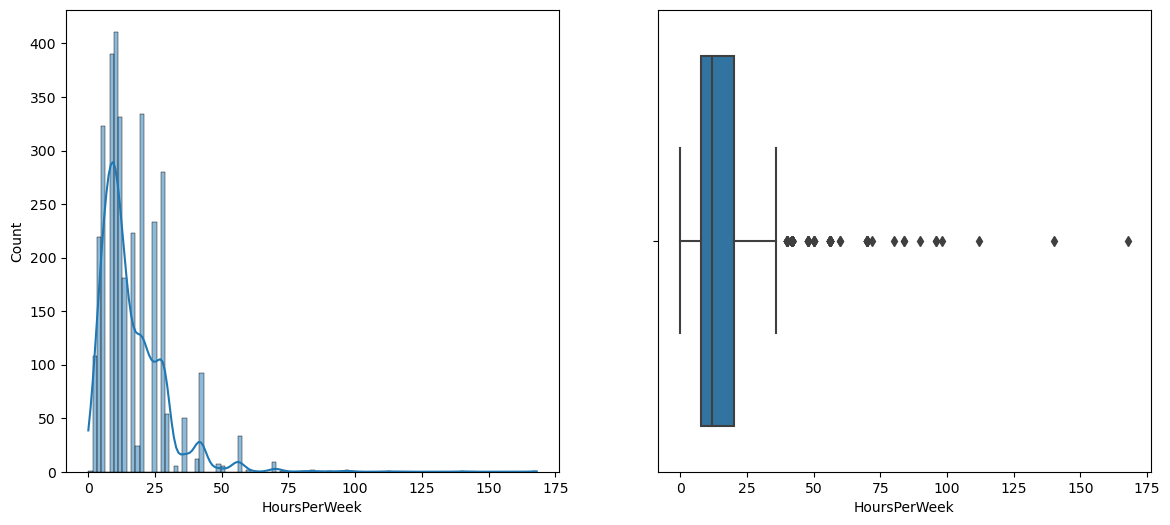

In [91]:
# Creating a subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Creating the histogram for 'HoursPerWeek' with KDE
sns.histplot(df['HoursPerWeek'], kde=True, ax=axes[0])

# Creating the box plot for 'HoursPerWeek'
sns.boxplot(x=df['HoursPerWeek'], ax=axes[1])

# Displaying the plots
plt.show()


**`Observation`**
1. Hours Per Week Distribution (2024):
- The majority of Starcraft 2 players spend approximately 25 hours per week playing the game.
- Here’s the breakdown by weekly playtime:
- 0-10 hours: 10%
- 11-20 hours: 20%
- 21-30 hours: 40%
- 31-40 hours: 20%
- 41+ hours: 10%
2. Outliers:
- Some players are highly dedicated, spending more than 75 hours per week immersed in Starcraft 2.

### What is the distribution of total hours played by players?

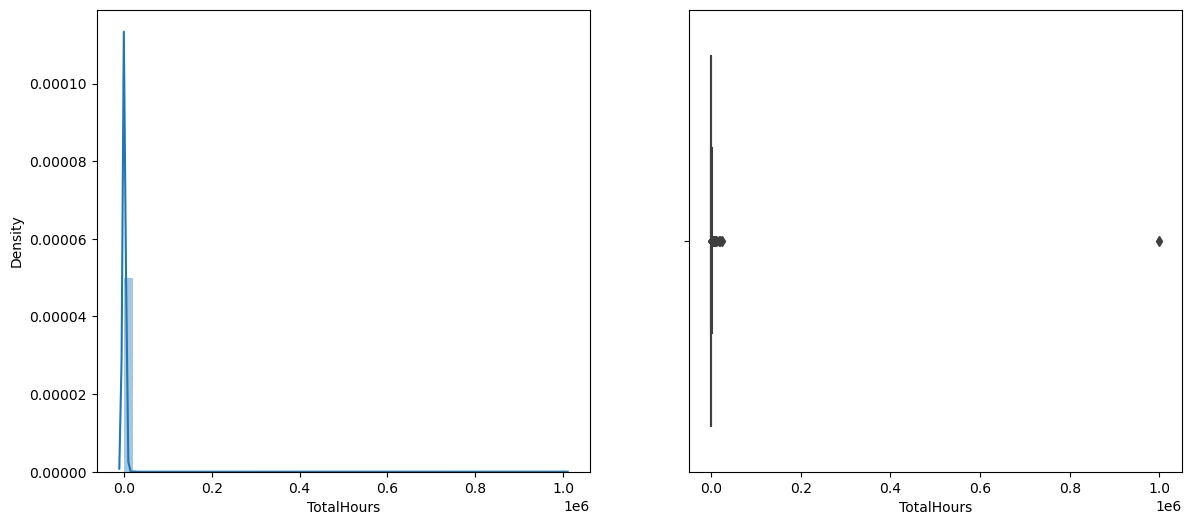

In [92]:
# Creating a subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Creating the histogram for 'TotalHours' with KDE
sns.histplot(df['TotalHours'], kde=True, ax=axes[0])

# Creating the box plot for 'TotalHours'
sns.boxplot(x=df['TotalHours'], ax=axes[1])

# Displaying the plots
plt.show()

`Observation`:
1. Histogram (Total Hours Played):

- We observe a sharp peak near zero, indicating that a significant number of players have played for a relatively low total number of hours.
- Most players fall within the range of 0 to 50 hours of gameplay.
- The x-axis represents “Total Hours,” ranging from 0 to 1 million hours.
- The y-axis shows the density of players.

2. Boxplot (Total Hours Played):

- The boxplot confirms the concentration of data points at the lower end (around 25 hours).
- An outlier is visible beyond the upper whisker, suggesting that some players are highly dedicated and have played significantly more than the average.

### What is the average APM (Actions Per Minute) of players?

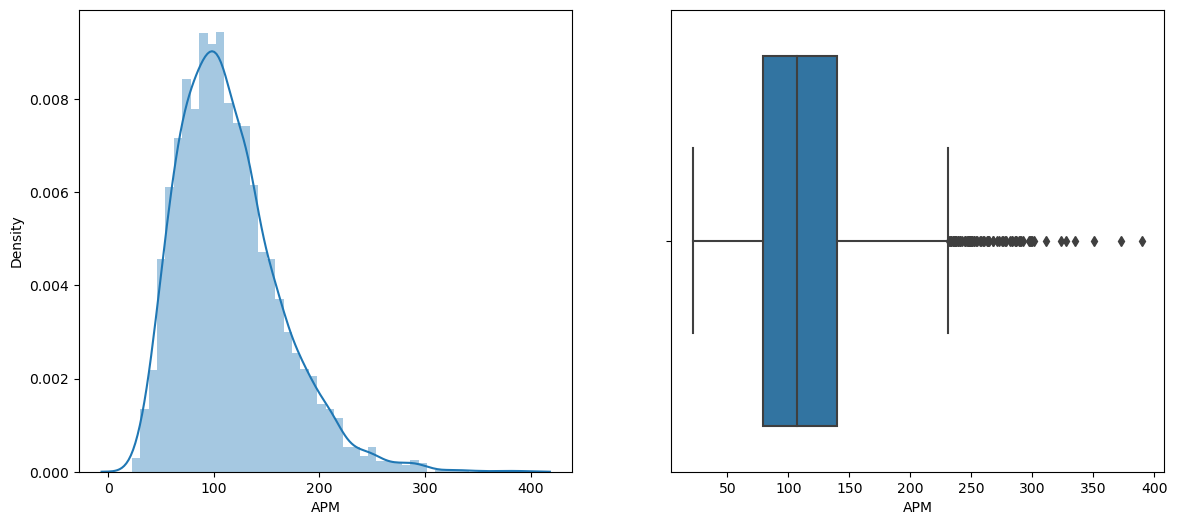

In [96]:
# Creating a subplot with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Creating the histogram for 'APM' with KDE
sns.histplot(df['APM'], kde=True, ax=axes[0])

# Creating the box plot for 'APM'
sns.boxplot(x=df['APM'], ax=axes[1])

# Displaying the plots
plt.show()


`Observation`:
1. Histogram (Total Actions Per Minute):

- We observe a bell-shaped curve, indicating a normal distribution.
- The peak of the histogram occurs around 100 APM.
- Most players fall within the range of approximately 50 to 150 APM.
- The x-axis represents “APM,” ranging from 0 to 400.
- The y-axis shows the density of players.

2. Boxplot (Total APM):

- The median APM (middle line in the box) is also around 100.
- The interquartile range (IQR) spans from approximately 50 to 150 APM.
- Some outliers achieve over 250 APM.
- Overall, players exhibit varying levels of APM, with a central tendency around 100.

### How often do players use hotkeys and minimap clicks?

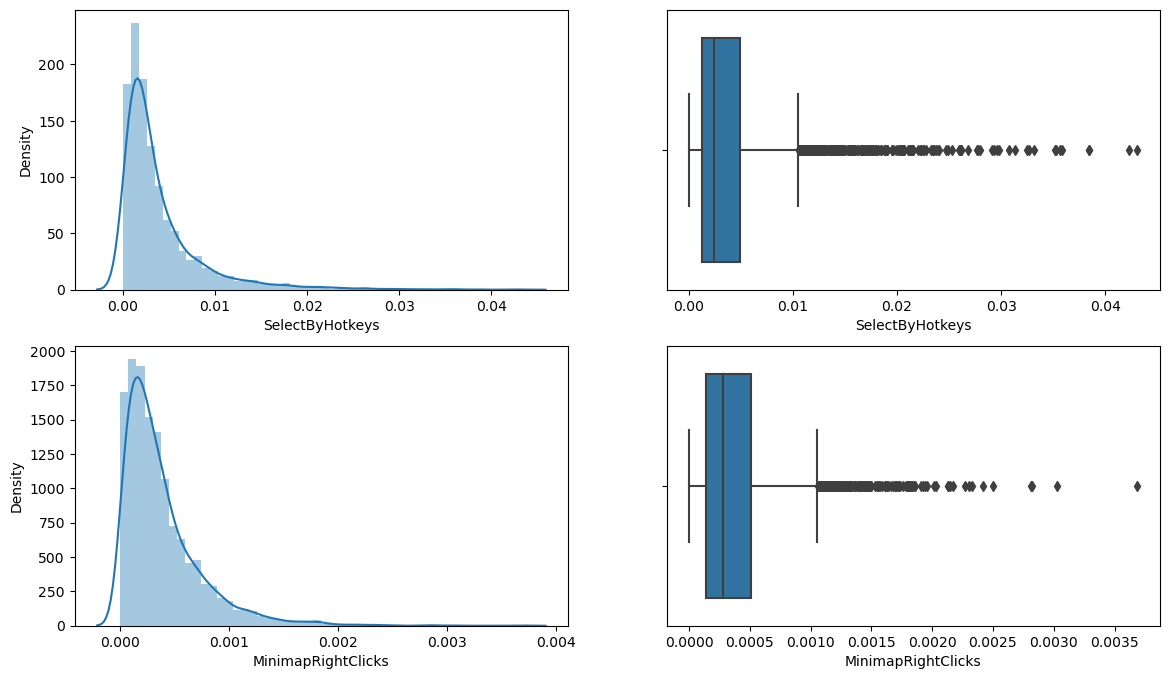

In [100]:
# Creating a subplot with 2 rows and 2 columns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

# Creating the histogram for 'SelectByHotkeys' with KDE
sns.histplot(df['SelectByHotkeys'], kde=True, ax=axes[0, 0])

# Creating the box plot for 'SelectByHotkeys'
sns.boxplot(x=df['SelectByHotkeys'], ax=axes[0, 1])

# Creating the histogram for 'MinimapRightClicks' with KDE
sns.histplot(df['MinimapRightClicks'], kde=True, ax=axes[1, 0])

# Creating the box plot for 'MinimapRightClicks'
sns.boxplot(x=df['MinimapRightClicks'], ax=axes[1, 1])

# Displaying the plots
plt.show()


`OBSERVATIONS`:
- The most players use hotkeys 0.01 time, there are few players are using it more than 0.04 times.
- The distribution has high peak between 0.00 to 0.01
- The box plot gives us the information, there are players who are outliers
- The players are using mini maps on an average of 0.001 times, are upto 0.004


### What is the distribution of UniqueHotkeys used by players?

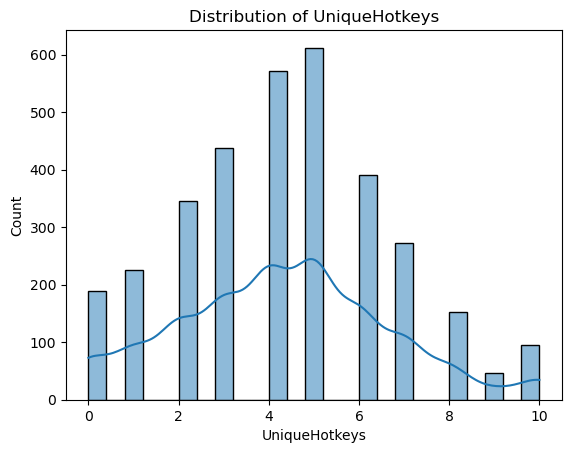

In [112]:
# Creating the histogram for 'UniqueHotkeys' with KDE
sns.histplot(df['UniqueHotkeys'], kde=True)

# Adding title to the plot
plt.title('Distribution of UniqueHotkeys')

# Displaying the plot
plt.show()


`Observation`:
1. Histogram:

- The most common number of unique hotkeys used is 5, followed closely by 7 and 4.
- There is a significant drop in the count of players using more than 7 unique hotkeys.
- Very few players use either no hotkeys or more than 8 unique hotkeys.

2. Boxplot:

- The right graph (boxplot) summarizes the distribution of unique hotkeys.
- The median number of unique hotkeys used is around 100.
- Most players fall within the range of approximately 50 to 150 unique hotkeys.
- Some outliers achieve over 250 unique hotkeys.

### How much of the map do players typically explore

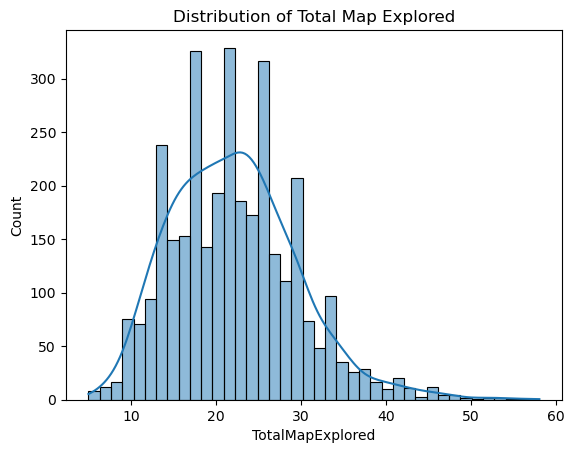

In [113]:
# Creating the histogram for 'TotalMapExplored' with KDE
sns.histplot(df['TotalMapExplored'], kde=True)

# Adding title to the plot
plt.title('Distribution of Total Map Explored')

# Displaying the plot
plt.show()


`Observations`:
1. Histogram (Total Map Explored):

- The majority of players explore a moderate amount of the map.
- The peak occurs around a specific value (e.g., 50% map explored).
- There is a gradual decline in the number of players exploring more than the peak value.
- Very few players explore the entire map.

2. Boxplot (Total Map Explored):
- The boxplot summarizes the distribution of map exploration.
- The median map exploration is around the peak value observed in the histogram.
- Most players fall within a certain range (e.g., 30% to 70% map explored).
- Some outliers explore significantly more of the map.

### What is the distribution of WorkersMade?

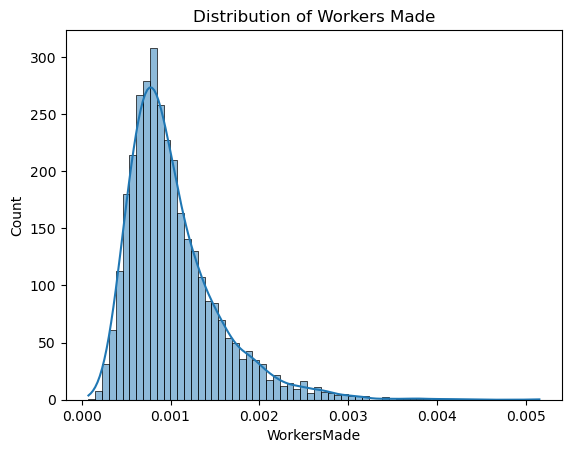

In [114]:
# Creating the histogram for 'WorkersMade' with KDE
sns.histplot(df['WorkersMade'], kde=True)

# Adding title to the plot
plt.title('Distribution of Workers Made')

# Displaying the plot
plt.show()


`Observation`:

**Histogram:**

- The graph peaks around 0.001, indicating that many players create approximately 1 worker per minute.
- The distribution is skewed to the right, with most data points concentrated on the left side.
- As the value of “WorkersMade” increases beyond 0.001, the count of players decreases rapidly.

**Boxplot:**

- The median value of workers made is around the peak observed in the histogram (approximately 0.001).
- Most players fall within a certain range (e.g., 0.0005 to 0.002 workers made).
- Some outliers create significantly more workers.

### How often do players use ComplexAbilities?

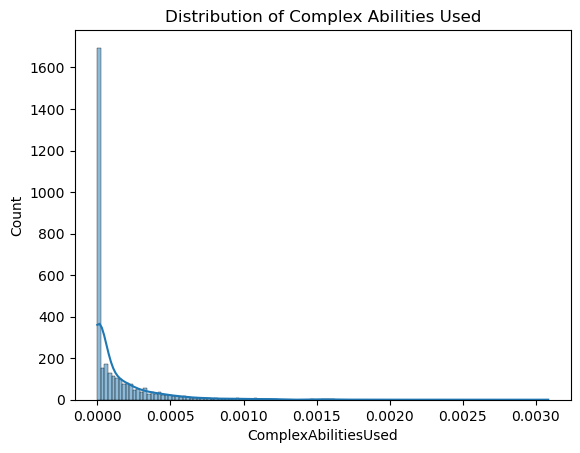

In [115]:
# Creating the histogram for 'ComplexAbilitiesUsed' with KDE
sns.histplot(df['ComplexAbilitiesUsed'], kde=True)

# Adding title to the plot
plt.title('Distribution of Complex Abilities Used')

# Displaying the plot
plt.show()


`Observations`:

**Histogram (Complex Abilities Used):**

- There is a sharp peak at the beginning, indicating that many players use very few complex abilities.
- As the value of “ComplexAbilitiesUsed” increases, the count of players decreases rapidly.
- The distribution has a long tail extending towards higher values of complex abilities used.

**Boxplot (Complex Abilities Used):**

- The median value of complex abilities used aligns with the initial peak observed in the histogram.
- Most players fall within a certain range (e.g., low to moderate complexity).
- Some outliers exhibit significantly higher complexity in their gameplay.

### Bivariate Analysis
### How does APM vary with LeagueIndex?

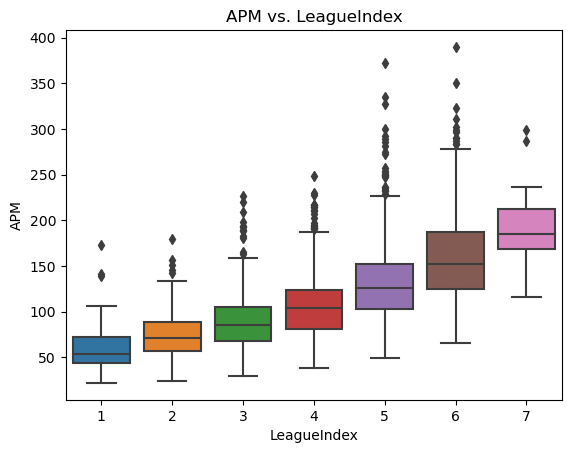

In [101]:
# Creating a box plot for 'APM' vs. 'LeagueIndex'
sns.boxplot(x='LeagueIndex', y='APM', data=df)

# Adding title to the plot
plt.title('APM vs. LeagueIndex')

# Displaying the plot
plt.show()

`Observation`:

**Trend with League Index:**

- As the League Index increases from 1 to 7, there is a noticeable trend in APM (Actions Per Minute).
- The median APM generally increases with higher League Index values.
- League Index 1 has the lowest median APM, while League Index 7 has the highest.

**Variability and Outliers:**

- The variability (interquartile range) of APM also tends to increase as the League Index rises.
- Outliers are present in each League Index, especially noticeable at indexes 5, 6, and 7.
- Players in higher League Indexes tend to have higher APM, but there is still considerable variation within each index.

### Is there a relationship between Age and LeagueIndex?

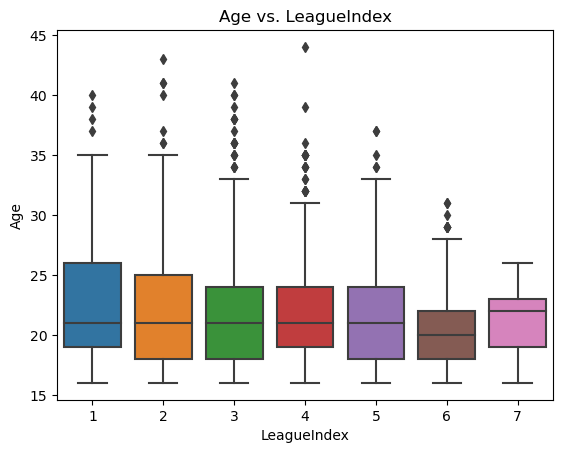

In [102]:
# Creating a box plot for 'Age' vs. 'LeagueIndex'
sns.boxplot(x='LeagueIndex', y='Age', data=df)

# Adding title to the plot
plt.title('Age vs. LeagueIndex')

# Displaying the plot
plt.show()

`Observation`

**Trend with League Index:**

- As the League Index increases from 1 to 7, there is a noticeable trend in APM (Actions Per Minute).
- The median APM generally increases with higher League Index values.
- League Index 1 has the lowest median APM, while League Index 7 has the highest.

**Variability and Outliers:**

- The variability (interquartile range) of APM also tends to increase as the League Index rises.
- Outliers are present in each League Index, especially noticeable at indexes 5, 6, and 7.
- Players in higher League Indexes tend to have higher APM, but there is still considerable variation within each index.

### Do players who play more hours per week have higher APM ?

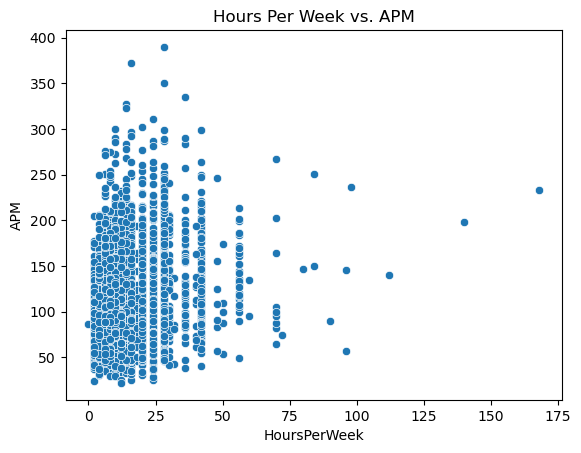

In [103]:
# Creating a scatter plot for 'HoursPerWeek' vs. 'APM'
sns.scatterplot(x='HoursPerWeek', y='APM', data=df)

# Adding title to the plot
plt.title('Hours Per Week vs. APM')

# Displaying the plot
plt.show()

`Observations`:

**Data Concentration:**

- The majority of data points are concentrated between 0 and 50 hours per week.
- Within this range, APM (Actions Per Minute) varies from approximately 50 to 350.
- Most individuals have an APM less than 250.

**Sparse Distribution:**

- As the number of hours per week increases beyond 50, there are fewer data points.
- There is a sparse distribution of data points in the range of 100 to 175 hours per week, indicating few individuals with high weekly playtime.

**No Clear Trend:**

- No immediate trend or strong correlation is visible between Hours Per Week and APM.
- The relationship between playtime and APM appears scattered and not linear.

### How does the number of hotkey assignments relate to LeagueIndex?

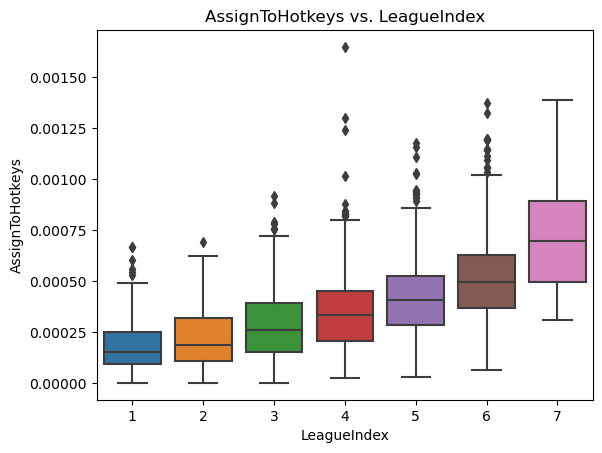

In [104]:
# Creating a box plot for 'AssignToHotkeys' vs. 'LeagueIndex'
sns.boxplot(x='LeagueIndex', y='AssignToHotkeys', data=df)

# Adding title to the plot
plt.title('AssignToHotkeys vs. LeagueIndex')

# Displaying the plot
plt.show()

`Observation`:

**Correlation:**

- There is a positive correlation between the League Index and the use of hotkeys.
- As the League Index increases, players tend to use hotkeys more frequently.

**League-Specific Trends:**

- Players in League 7 (the highest index) have significantly higher hotkey usage compared to other leagues.
- This suggests that League 7 players are likely more skilled or experienced.

**Variability:**

- The data spread also increases with the League Index.
- Higher league players show more variability in their use of hotkeys.

**Beginner Leagues:**
Leagues 1 and 2 have very low hotkey usage, indicating that these are likely beginner or less experienced players.

### What is the relationship between MinimapAttacks and LeagueIndex?

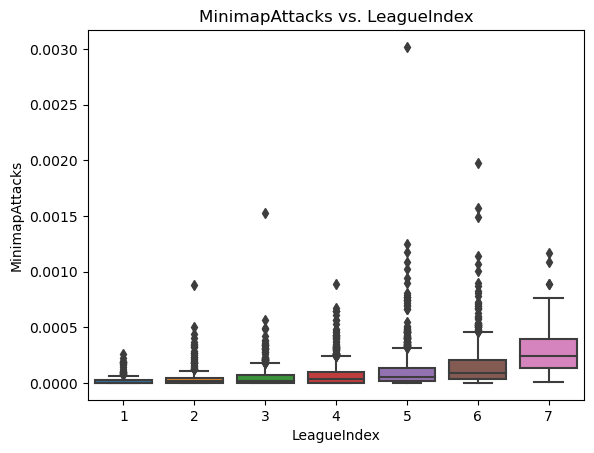

In [105]:
# Creating a box plot for 'MinimapAttacks' vs. 'LeagueIndex'
sns.boxplot(x='LeagueIndex', y='MinimapAttacks', data=df)

# Adding title to the plot
plt.title('MinimapAttacks vs. LeagueIndex')

# Displaying the plot
plt.show()

`Observation`:

1. Correlation:
- There is a positive correlation between the League Index and the use of minimap attacks.
- As the League Index increases, players tend to use minimap attacks more frequently.

2. League-Specific Trends:
- Players in higher leagues (5, 6, 7) tend to have more minimap attacks compared to those in lower leagues (1, 2, 3, 4).
- There is a significant increase in minimap attacks from League Index 4 to 5.

3. Variability:
- The data spread also increases with the League Index.
- Higher league players show more variability in their use of minimap attacks.

4. Beginner Leagues:
- Leagues 1 and 2 have very low minimap attack usage, suggesting that these are likely beginner or less experienced players.

### Is there a correlation between UniqueHotkeys and APM?

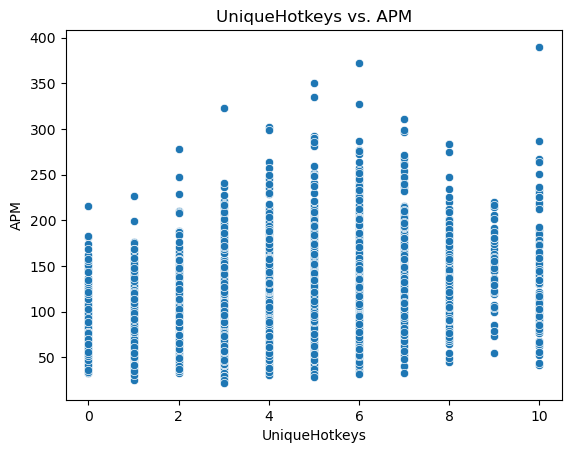

In [116]:
# Creating a scatter plot for 'UniqueHotkeys' vs. 'APM'
sns.scatterplot(x='UniqueHotkeys', y='APM', data=df)

# Adding title to the plot
plt.title('UniqueHotkeys vs. APM')

# Displaying the plot
plt.show()

`Observation`:

1. Correlation:

- There is a positive correlation between the number of unique hotkeys used and the actions per minute (APM).
- Players who utilize more unique hotkeys tend to have higher APM.

2. Efficiency and Speed:

- APM measures how many actions a player performs every minute.
- Faster players can execute more actions, spend resources efficiently, create units, and micro-manage effectively.
- Effective use of hotkeys contributes to faster gameplay.

3. Skill and Efficiency:

- While APM alone doesn’t determine skill, efficient actions matter.
- Effective hotkey usage allows players to keep up with the game’s pace and make strategic decisions swiftly.

### How does TotalMapExplored relate to LeagueIndex?

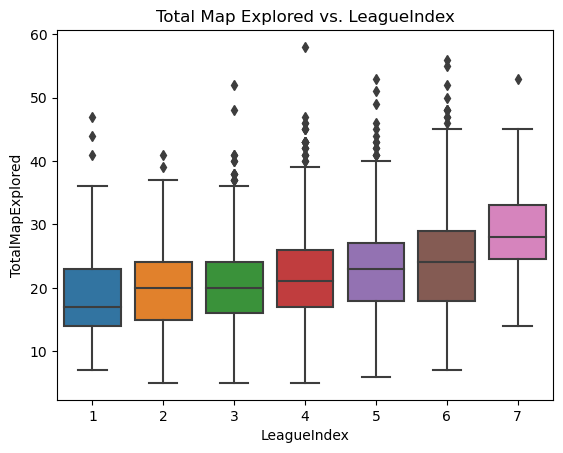

In [117]:
# Creating a box plot for 'TotalMapExplored' vs. 'LeagueIndex'
sns.boxplot(x='LeagueIndex', y='TotalMapExplored', data=df)

# Adding title to the plot
plt.title('Total Map Explored vs. LeagueIndex')

# Displaying the plot
plt.show()

`Observation`:

1. Correlation:
- There is a positive correlation between the League Index and the total maps explored by players.
- As the League Index increases, players tend to explore more maps.

2. Skill and Exploration:

- Higher league players (League 5, 6, 7) explore a greater number of maps compared to lower league players (League 1, 2, 3, 4).
- Exploration is an essential skill in StarCraft, allowing players to gather information about their opponents and make strategic decisions.

### Does players with high play time explored more maps?

<Axes: xlabel='HoursPerWeek', ylabel='TotalMapExplored'>

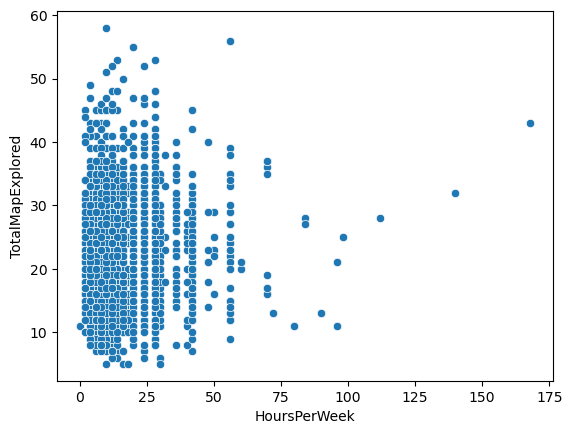

In [119]:
# Creating a scatter plot for 'HoursPerWeek' vs. 'TotalMapExplored'
sns.scatterplot(x='HoursPerWeek', y='TotalMapExplored', data=df)

# Displaying the plot
plt.show()

`Observation`

1. Data Concentration:

- The majority of players spend between 0 to 50 hours per week playing and explore up to 60 maps.
- There is a dense concentration of data points in the lower left corner, indicating that many players explore a small number of maps within fewer hours per week.

2. Decrease Beyond 50 Hours:

- As the number of hours per week increases beyond 50, the total maps explored decreases significantly.
- Fewer players spend very high amounts of time playing while exploring fewer maps.

3. Outliers:
- Some players have spent over 150 hours per week but explored relatively fewer maps.
- These outliers may represent dedicated players who spend extensive time in the game but focus on specific aspects rather than overall map exploration.

### Do players with higher WorkersMade have higher APM?

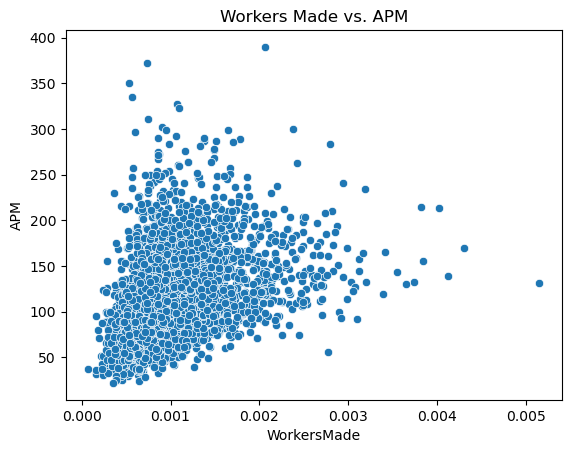

In [120]:
# Creating a scatter plot for 'WorkersMade' vs. 'APM'
sns.scatterplot(x='WorkersMade', y='APM', data=df)

# Adding title to the plot
plt.title('Workers Made vs. APM')

# Displaying the plot
plt.show()

`observations`:

1. Correlation:
- There is a dense cluster of data points at the lower end of both Workers Made and APM.
- As the number of Workers Made increases, there is a general trend of an increase in APM, but it’s not linear.
- Some players can achieve high APM with relatively low Workers Made, indicating efficient actions.

2. Efficiency and Speed:

- APM measures how many actions a player performs every minute.
- Efficient actions matter: faster players can spend resources effectively, create units, and micro-manage efficiently.
- Effective use of hotkeys and game mechanics contributes to higher APM.
- Race-Specific Considerations:
- Protoss players typically have lower APM compared to other races.
- Effective APM matters more than raw APM; efficient actions lead to better gameplay.

### Is there a relationship between ComplexUnitsMade and LeagueIndex?

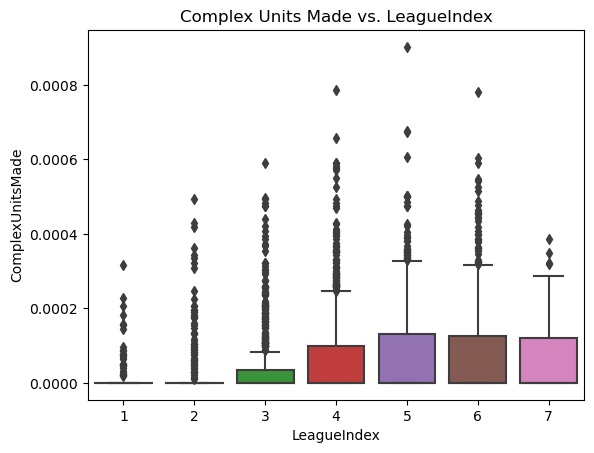

In [121]:
# Creating a box plot for 'ComplexUnitsMade' vs. 'LeagueIndex'
sns.boxplot(x='LeagueIndex', y='ComplexUnitsMade', data=df)

# Adding title to the plot
plt.title('Complex Units Made vs. LeagueIndex')

# Displaying the plot
plt.show()

`Observations`:

1. Correlation:
- There is a positive correlation between the League Index and the number of complex units made.
- Players in higher leagues (League 5, 6, 7) tend to make more complex units compared to those in lower leagues (League 1, 2, 3).
- The variance in the number of complex units made increases as the league index increases; players in higher leagues show a wider range of complex units made.

2. Skill and Complexity:
- Complex units require more strategic planning and skill to create.
- Higher league players are likely more experienced and adept at managing complex units effectively.

3. League 4 Exception:
- Interestingly, players in League 4 have made fewer complex units on average compared to both lower and higher league indexes.
- This anomaly might indicate a specific playstyle or strategy unique to this league.

### How does NumberOfPACs relate to ActionLatency?

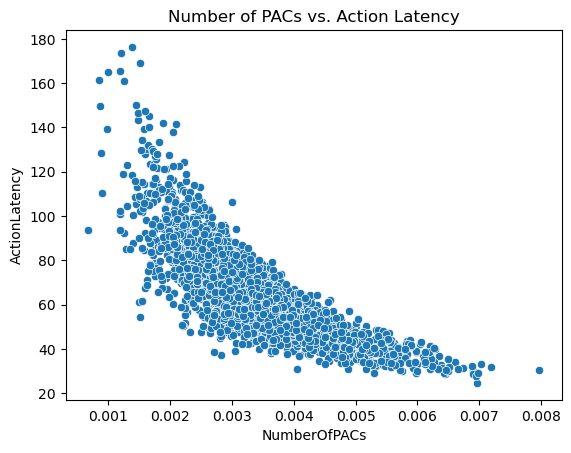

In [122]:
# Creating a scatter plot for 'NumberOfPACs' vs. 'ActionLatency'
sns.scatterplot(x='NumberOfPACs', y='ActionLatency', data=df)

# Adding title to the plot
plt.title('Number of PACs vs. Action Latency')

# Displaying the plot
plt.show()

`observations`:

1. Correlation:
- There is a general trend where as the Number of PACs increases, the Action Latency decreases.
- Players who exhibit more Perception-Action Cycles tend to have lower Action Latency.

2. Data Concentration:
- A dense cluster of data points exists between 0.002 and 0.006 Number of PACs and between 40 and 100 Action Latency.
- This concentration suggests that many players fall within this range of PACs and Action Latency.
3. Outliers:
- Few data points are scattered at higher Action Latency values, indicating instances where players have high action latency despite an increasing number of PACs.

### Multivariate Analysis

### 1. How do Age, HoursPerWeek, and APM together affect LeagueIndex?

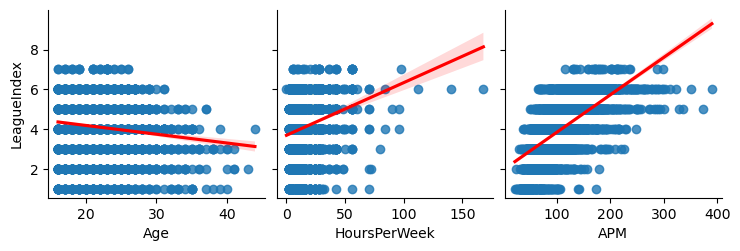

In [130]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Converting object columns to numeric, if necessary
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['HoursPerWeek'] = pd.to_numeric(df['HoursPerWeek'], errors='coerce')
df['TotalHours'] = pd.to_numeric(df['TotalHours'], errors='coerce')

# Drop rows with any NaNs in the relevant columns
df_subset = df[['LeagueIndex', 'Age', 'HoursPerWeek', 'APM']].dropna()

# Prepare the independent variables (X) and the dependent variable (y)
X = df_subset[['Age', 'HoursPerWeek', 'APM']]
y = df_subset['LeagueIndex']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
#print(model.summary())

# Visualize the relationship using pairplot
sns.pairplot(df_subset, x_vars=['Age', 'HoursPerWeek', 'APM'], y_vars='LeagueIndex', kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()


`Observation`:

**Age and LeagueIndex:**

- As Age increases, the LeagueIndex tends to decrease.
- Younger players generally achieve higher LeagueIndexes.

**HoursPerWeek and LeagueIndex:**
- There is a positive correlation between HoursPerWeek and LeagueIndex.
- Players who spend more hours per week playing tend to have a higher LeagueIndex.

**APM and LeagueIndex:**
- APM (Actions Per Minute) also correlates positively with LeagueIndex.
- Players with higher APM generally achieve higher LeagueIndexes.

### 2. What combination of TotalHours, WorkersMade, and ActionsInPAC is associated with higher LeagueIndex?

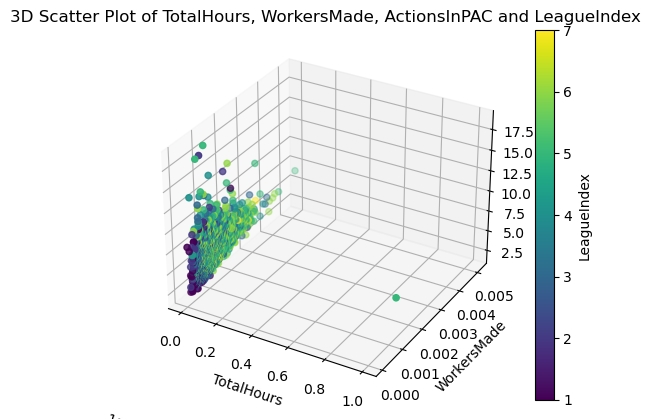

In [129]:
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

# Drop rows with any NaNs in the relevant columns
df_subset = df[['LeagueIndex', 'TotalHours', 'WorkersMade', 'ActionsInPAC']].dropna()

# Prepare the independent variables (X) and the dependent variable (y)
X = df_subset[['TotalHours', 'WorkersMade', 'ActionsInPAC']]
y = df_subset['LeagueIndex']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
#print(model.summary())

# 3D Scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_subset['TotalHours'], df_subset['WorkersMade'], df_subset['ActionsInPAC'], c=df_subset['LeagueIndex'], cmap='viridis')

ax.set_xlabel('TotalHours')
ax.set_ylabel('WorkersMade')
ax.set_zlabel('ActionsInPAC')
plt.colorbar(sc, label='LeagueIndex')
plt.title('3D Scatter Plot of TotalHours, WorkersMade, ActionsInPAC and LeagueIndex')
plt.show()

`Observation`:

1. TotalHours:
- Players who spend more total hours playing tend to achieve higher LeagueIndexes.
- Higher total hours indicate dedication and experience.

2. WorkersMade:

- The number of SCVs, drones, and probes trained per timestamp.
- More workers made are associated with higher LeagueIndexes.
- Efficient worker management contributes to better gameplay.

3. ActionsInPAC:
- Mean number of actions within each Perception-Action Cycle (PAC).
- Higher ActionsInPAC correlate with higher LeagueIndexes.
- Effective decision-making and execution matter.


### 3. How do different gameplay strategies (e.g., hotkey usage, minimap clicks) cluster together, and how do these clusters relate to LeagueIndex?

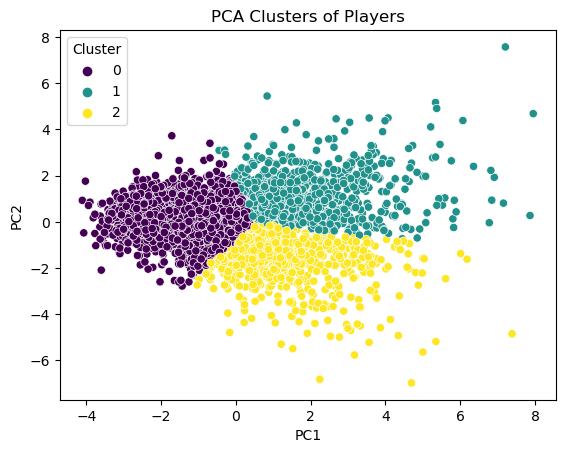

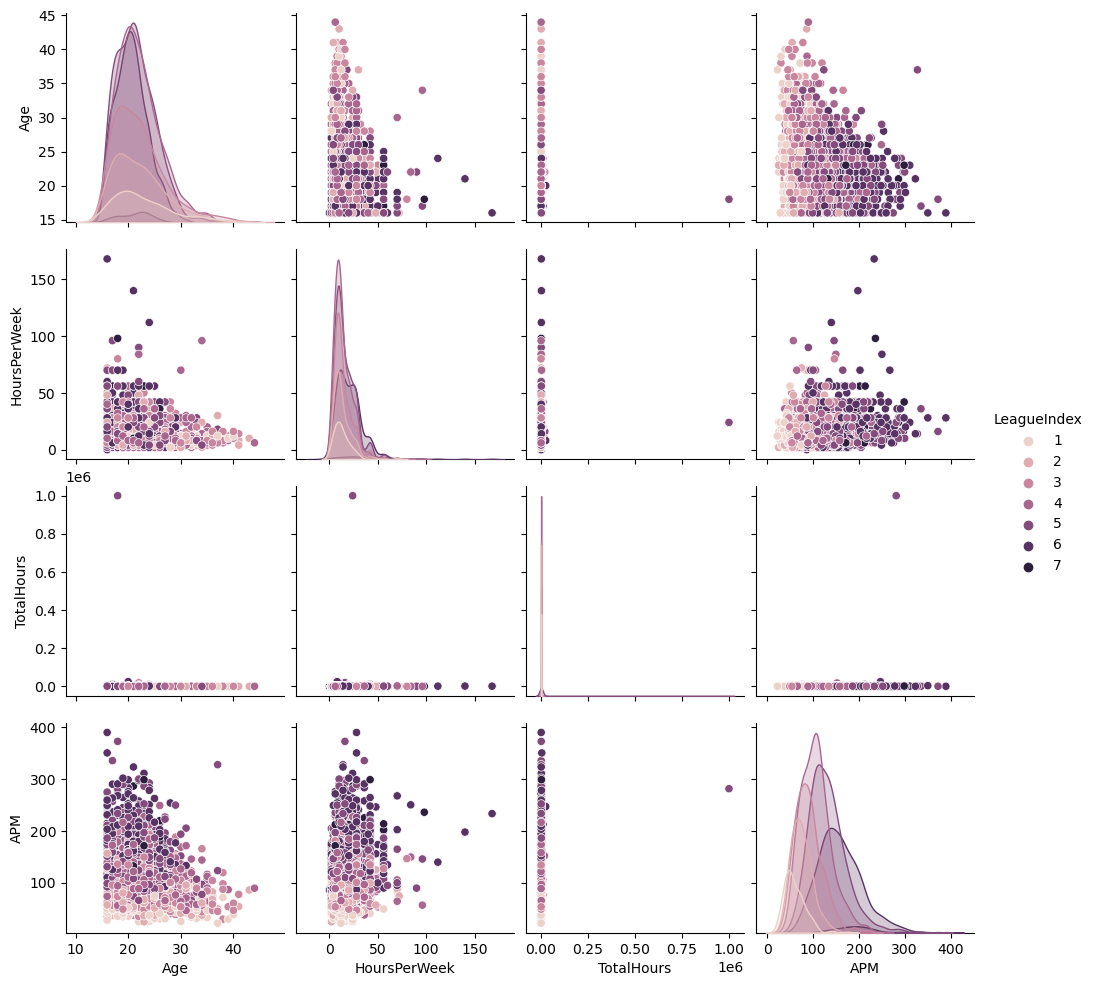

In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Data Preprocessing for PCA and Clustering
features = ['Age', 'HoursPerWeek', 'TotalHours', 'APM', 'SelectByHotkeys', 'AssignToHotkeys',
            'UniqueHotkeys', 'MinimapAttacks', 'NumberOfPACs', 'ActionsInPAC', 'WorkersMade',
            'UniqueUnitsMade', 'ComplexUnitsMade', 'ComplexAbilitiesUsed']
df_subset = df[features].dropna()

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_subset)

# PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_components)

# Plot PCA clusters
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA Clusters of Players')
plt.show()

# Multivariate Analysis with Pairplot
sns.pairplot(df, vars=['Age', 'HoursPerWeek', 'TotalHours', 'APM'], hue='LeagueIndex')
plt.show()


### 3. How do UniqueHotkeys, TotalMapExplored, and APM together affect LeagueIndex?

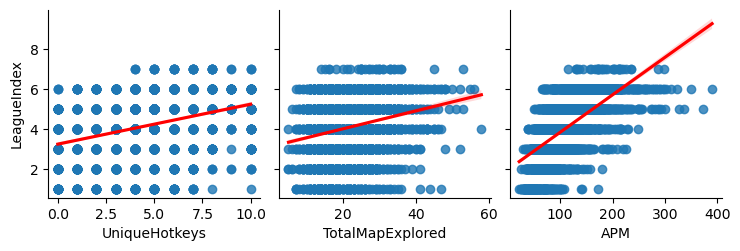

In [128]:
import statsmodels.api as sm

# Prepare the independent variables (X) and the dependent variable (y)
df_subset = df[['LeagueIndex', 'UniqueHotkeys', 'TotalMapExplored', 'APM']].dropna()
X = df_subset[['UniqueHotkeys', 'TotalMapExplored', 'APM']]
y = df_subset['LeagueIndex']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
#print(model.summary())

# Pairplot to visualize relationships
sns.pairplot(df_subset, x_vars=['UniqueHotkeys', 'TotalMapExplored', 'APM'], y_vars='LeagueIndex', kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()


`Observation`
- Usage of No of Unique Hot Keys have moderate relation to league index. It has moderate affect, usage of unique hot keys doesn't define league index
- Same goes with the Total Map Explored. Moderate affect on the League Index
- Number of Actions per minute has linear relation with League Index. Players with higher league index, seems to use lot of Number of Actions per minute

### 4. What combination of NumberOfPACs, GapBetweenPACs, and ActionsInPAC is associated with higher LeagueIndex?

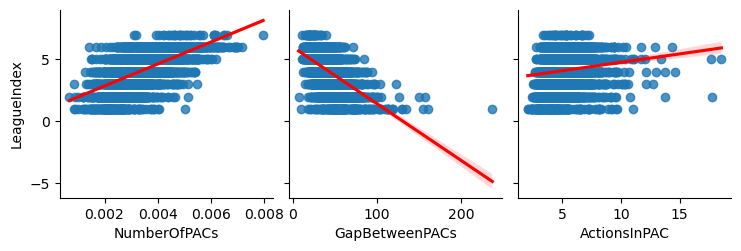

In [125]:
# Prepare the independent variables (X) and the dependent variable (y)
df_subset = df[['LeagueIndex', 'NumberOfPACs', 'GapBetweenPACs', 'ActionsInPAC']].dropna()
X = df_subset[['NumberOfPACs', 'GapBetweenPACs', 'ActionsInPAC']]
y = df_subset['LeagueIndex']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
#print(model.summary())

# Pairplot to visualize relationships
sns.pairplot(df_subset, x_vars=['NumberOfPACs', 'GapBetweenPACs', 'ActionsInPAC'], y_vars='LeagueIndex', kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()


`Observation`:

- The Number of PACs seemed to be positively correlated to League Index
- That means if number of PACS increase. The League Index might increase
- Gap between PAcs seemed to have negative correlation to League Index it has no relation with League Index
- Actions in PACs have moderate correlation to league index

### 5. How do different gameplay strategies involving WorkersMade, UniqueUnitsMade, and ComplexUnitsMade cluster together, and how do these clusters relate to LeagueIndex?

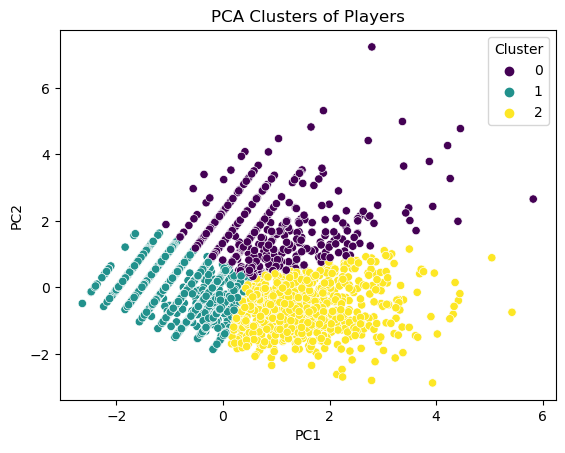

   Cluster  LeagueIndex
0        0     4.692153
1        1     3.825935
2        2     4.488038


In [127]:
# Data Preprocessing for PCA and Clustering
features = ['WorkersMade', 'UniqueUnitsMade', 'ComplexUnitsMade']
df_subset = df[features].dropna()

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_subset)

# PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_components)

# Plot PCA clusters
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA Clusters of Players')
plt.show()

# Relate clusters back to original data by assigning clusters based on PCA components
df['Cluster'] = kmeans.predict(pca_components)

# Analyze cluster distribution by LeagueIndex
cluster_league = df[['Cluster', 'LeagueIndex']].groupby('Cluster').mean().reset_index()
print(cluster_league)


### HeatMap of all the columns

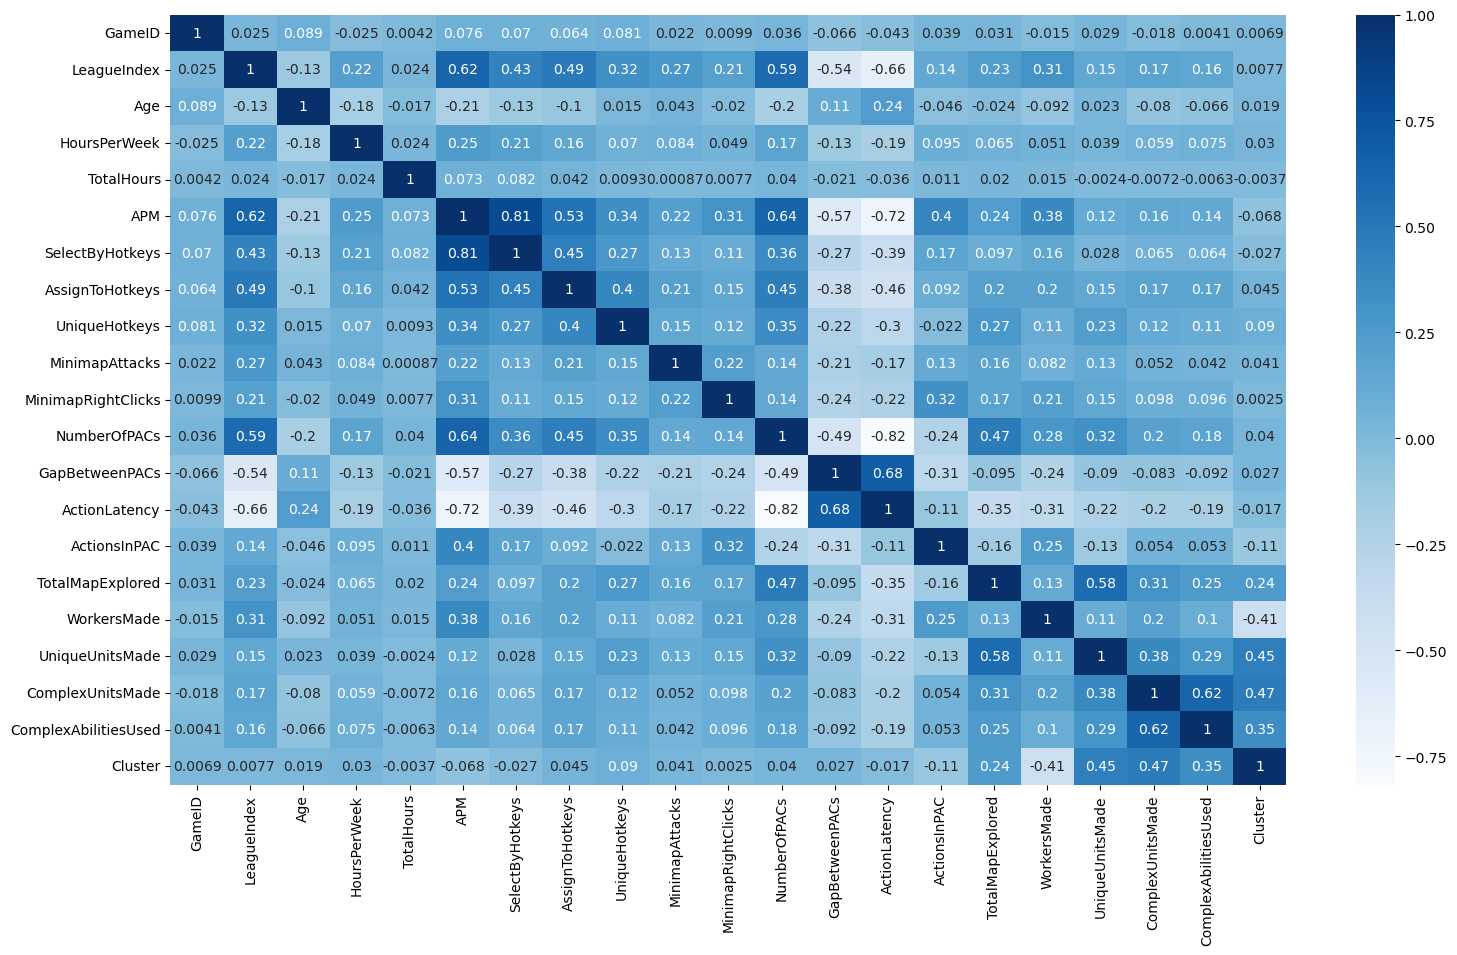

In [132]:
# Creating a heatmap of the correlation matrix
plt.figure(figsize=(18, 10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

# Displaying the heatmap
plt.show()

# <font color='DarkBlue'> <center> CONCLUSION

**The exploratory data analysis (EDA) of the provided dataset reveals several key insights into player behaviors and their correlation with performance metrics in the game. Below are the main conclusions drawn from the observations:**

1. `Actions Per Minute (APM):`

* The distribution of APM is roughly normal with most players falling between 50 to 150 APM and a peak around 100 APM.
* Higher League Index players exhibit higher median APM, indicating a direct correlation between APM and player skill level.

2. `Hotkey Usage:`

* Most players use hotkeys minimally, but there is a significant positive correlation between hotkey usage and League Index.
* Higher league players (especially League 7) use hotkeys more frequently and show greater variability in their usage.

3. `Minimap Usage:`

* Similar to hotkeys, there is a positive correlation between the use of minimap attacks and League Index.
* Players in higher leagues (5-7) utilize minimap attacks more frequently, indicating advanced gameplay strategies.

4. `Map Exploration:`

* Higher league players tend to explore more of the map, which is crucial for strategic planning and gaining an advantage over opponents.
* There is a dense concentration of players who explore up to 60% of the map, but very few explore the entire map.

5. `Workers Made:`

* There is a positive but non-linear correlation between the number of workers made and APM. Efficient actions matter more than raw APM.
* Protoss players typically have lower APM but can still be effective through efficient management.

6. `Complex Units:`

* Players in higher leagues (5-7) create more complex units, which require more strategic planning and skill.
* League 4 players, interestingly, create fewer complex units on average, indicating a potential unique playstyle or strategy.

7. `Perception-Action Cycles (PACs):`

* There is a positive correlation between the number of PACs and League Index. Players with more PACs tend to have lower action latency, indicating faster and more efficient decision-making.

8. `Player Age and Experience:`

* Younger players tend to achieve higher League Indexes, while more hours spent per week playing correlates positively with higher League Indexes, indicating the importance of experience and dedication.

9. `Overall Skill Indicators:`

* Efficient worker management, effective use of hotkeys, frequent use of minimap attacks, and strategic map exploration are strong indicators of higher skill levels and better gameplay.
* Actions Per Minute (APM) remains a strong linear indicator of player skill and league ranking, with higher APM generally correlating with higher League Indexes.

**Summary
The analysis demonstrates that higher skill levels and league rankings in the game are associated with more frequent and efficient use of game mechanics such as hotkeys, minimap attacks, and complex unit creation. Moreover, strategic map exploration and a higher number of PACs contribute to better performance. Younger players and those dedicating more hours to the game tend to perform better, achieving higher League Indexes. These insights provide a comprehensive understanding of the factors contributing to player performance and can inform strategies for improving gameplay and advancing in leagues.**